<a href="https://colab.research.google.com/github/DonRoboto/AprendizajeAutomatizado/blob/master/Tarea3/Tarea3_ej2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 2
<br>
Inciso b)

Se importan librerias

In [0]:
import pandas as pd
import numpy as np

Se definen las funciones para entrenar un modelo mediante regresión logistica

In [0]:
def sigmoide(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

def funcion_perdida(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def descenso_gradiente(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

def actualiza_pesos(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

Cargamos datos de partidas de entrenamiento y validación

In [0]:
#CARGAR LOS DATOS
data_train = pd.read_csv("https://raw.githubusercontent.com/DonRoboto/AprendizajeAutomatizado/master/Tarea3/juegos_entrenamiento.txt",header=None, delimiter=r"\s+")
df_train = pd.DataFrame(data_train)

data_test = pd.read_csv("https://raw.githubusercontent.com/DonRoboto/AprendizajeAutomatizado/master/Tarea3/juegos_validacion.txt",header=None, delimiter=r"\s+")
df_test = pd.DataFrame(data_test)

Creamos una nueva matriz donde se codifican los ID de los jugadores en un vector

In [0]:
num_rows_train, num_cols_train = data_train.shape
id_max = data_train.max().max()

a=[0]*int(id_max)
juegos =[a]*num_rows_train
juegos_train = pd.DataFrame(juegos)

for row in range(num_rows_train):
    A = df_train[0][row]
    B = df_train[1][row]
    Y = df_train[2][row]
    
    juegos_train[A-1][row]=1
    juegos_train[B-1][row]=1
    if(Y==1):
        juegos_train[id_max-1][row]=1
    else:
        juegos_train[id_max-1][row]=0
juegos_train = np.array(juegos_train)

X_train = juegos_train[:,0:id_max-1]
y_train = juegos_train[:,-1]

Matriz codificada de las partidas de validación

In [0]:
num_rows_test, num_cols_test = data_test.shape

a=[0]*int(id_max)
juegos =[a]*num_rows_test
juegos_test = pd.DataFrame(juegos)

for row in range(num_rows_test):
    A = df_test[0][row]
    B = df_test[1][row]
    Y = df_test[2][row]
    
    juegos_test[A-1][row]=1
    juegos_test[B-1][row]=1
    if(Y==1):
        juegos_test[id_max-1][row]=1
    else:
        juegos_test[id_max-1][row]=0
juegos_test = np.array(juegos_test)

X_test = juegos_test[:,:id_max-1]
y_test = juegos_test[:,-1]

Se entrena con el modelo de regresión logística

In [0]:
num_iter = 100000

intercept_train = np.ones((X_train.shape[0], 1)) 
X_train = np.concatenate((intercept_train, X_train), axis=1)
theta = np.zeros(X_train.shape[1])

for i in range(num_iter):
    h = sigmoide(X_train, theta)
    gradient = descenso_gradiente(X_train, h, y_train)
    theta = actualiza_pesos(theta, 0.001, gradient)

Evaluamos con el modelo entrenado

In [0]:
intercept_test = np.ones((X_test.shape[0], 1)) 
X_test = np.concatenate((intercept_test, X_test), axis=1)

y_val = sigmoide(X_test, theta)

Convertimos los valores a etiquetas 0 o 1 dependiendo de un umbral

In [0]:
y_label = [0] * len(y_val)
v_max = max(y_val)
v_min = min(y_val)
umbral = (v_max-v_min)/2

for i in range(len(y_val)):
    if(y_val[i]>umbral):
        y_label[i]=1
    else:
        y_label[i]=0

Evaluamos los casos en los que coincide el modelo con el conjunto de validación

In [0]:
score=[]
for y1, y2 in zip(y_test, y_label):
    if y1 == y2:
        score.append(1)
    else:
        score.append(0)

print("Accuracy:", sum(score)/len(score))

Accuracy: 0.7130434782608696


Comparamos este resultado con el que obtendríamos mediante las librerias de sklearn

In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

model=LogisticRegression()
model.fit(X_train,y_train)

score2 = metrics.accuracy_score(y_test, y_label)

print("Accuracy:", score2)

Accuracy: 0.7130434782608696


Lo que representa una mejora con respecto al modelo Bayesiano

Graficamos la curva ROC

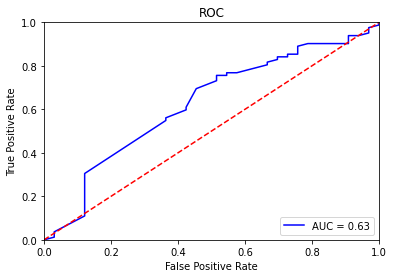

In [0]:
import matplotlib.pyplot as plt
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_val)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Graficamos la curva precisiónexhaustividad

Average precision-recall score: 0.77


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.77')

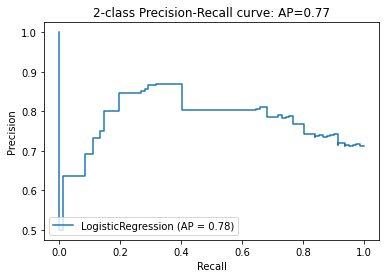

In [0]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_val)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))